In [1]:
import pandas as pd


In [2]:

fraud = pd.read_csv('fraud.csv',encoding='gbk')

fraud


,识别码,自然日,交易所委托号,委托时间,委托代码,委托价格,委托数量,成交时间,成交代码,BS标志,...,撤单率,价差_calc,挂单簇拥,订单存活时间_outlier,撤单率_outlier,价差_outlier,订单规模_outlier,挂单簇拥_outlier,outlier_count,虚假挂单
0,20250303571349,20250303,571349,93000030,B,64000.0,700,93000200.0,0,S,...,0.000000,0.0,13,False,False,False,False,False,0,F
1,20250303574530,20250303,574530,93000040,B,63100.0,1600,NaN,NaN,NaN,...,1.000000,NaN,3,False,True,False,False,False,1,F
2,20250303575192,20250303,575192,93000040,B,62100.0,1000,NaN,NaN,NaN,...,1.000000,NaN,3,False,True,False,False,False,1,F
3,20250303575563,20250303,575563,93000050,B,63500.0,800,93229490.0,0,S,...,0.000000,0.0,9,False,False,False,False,False,0,F
4,20250303580804,20250303,580804,93000060,B,64000.0,4000,93000200.0,0,S,...,0.000000,0.0,13,False,False,False,False,False,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178605,2025033135294516,20250331,35294516,145658920,S,72800.0,6700,145659630.0,0,B,...,0.835821,0.0,13,False,True,False,False,False,1,F
1178606,2025033135294957,20250331,35294957,145659090,S,72800.0,1000,NaN,NaN,NaN,...,1.000000,NaN,13,False,True,False,False,False,1,F
1178607,2025033135295152,20250331,35295152,145659160,S,72800.0,500,NaN,NaN,NaN,...,1.000000,NaN,13,False,True,False,False,False,1,F
1178608,2025033135296804,20250331,35296804,145659930,S,72800.0,1500,NaN,NaN,NaN,...,1.000000,NaN,6,False,True,False,False,False,1,F


In [3]:
fraud.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178610 entries, 0 to 1178609
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   识别码             1178610 non-null  int64  
 1   自然日             1178610 non-null  int64  
 2   交易所委托号          1178610 non-null  int64  
 3   委托时间            1178610 non-null  int64  
 4   委托代码            1178610 non-null  object 
 5   委托价格            1178610 non-null  float64
 6   委托数量            1178610 non-null  int64  
 7   成交时间            1134272 non-null  float64
 8   成交代码            1134272 non-null  object 
 9   BS标志            1125763 non-null  object 
 10  成交价格            1134272 non-null  float64
 11  成交数量            1134272 non-null  float64
 12  叫卖序号            1134272 non-null  float64
 13  叫买序号            1134272 non-null  float64
 14  价差              1157897 non-null  float64
 15  来源路径            1178610 non-null  object 
 16  订单规模            1178610 non-null  in

In [5]:
delete_columns = [ '订单存活时间','撤单率','成交时间', '成交代码','成交价格', '成交数量', '叫卖序号', '叫买序号','来源路径', '价差_calc', '订单存活时间_outlier', '撤单率_outlier', '价差_outlier', '订单规模_outlier', '挂单簇拥_outlier', 'outlier_count']

fraud_del = fraud.drop(delete_columns, axis=1)

fraud_del

,识别码,自然日,交易所委托号,委托时间,委托代码,委托价格,委托数量,BS标志,价差,订单规模,挂单簇拥,虚假挂单
0,20250303571349,20250303,571349,93000030,B,64000.0,700,S,-100.0,700,13,F
1,20250303574530,20250303,574530,93000040,B,63100.0,1600,NaN,-1000.0,1600,3,F
2,20250303575192,20250303,575192,93000040,B,62100.0,1000,NaN,-2000.0,1000,3,F
3,20250303575563,20250303,575563,93000050,B,63500.0,800,S,-600.0,800,9,F
4,20250303580804,20250303,580804,93000060,B,64000.0,4000,S,-100.0,4000,13,F
...,...,...,...,...,...,...,...,...,...,...,...,...
1178605,2025033135294516,20250331,35294516,145658920,S,72800.0,6700,B,0.0,6700,13,F
1178606,2025033135294957,20250331,35294957,145659090,S,72800.0,1000,NaN,0.0,1000,13,F
1178607,2025033135295152,20250331,35295152,145659160,S,72800.0,500,NaN,0.0,500,13,F
1178608,2025033135296804,20250331,35296804,145659930,S,72800.0,1500,NaN,0.0,1500,6,F


In [6]:
# 保存数据
fraud_del.to_csv('fraud_del.csv', index=False)

In [7]:
fraud_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178610 entries, 0 to 1178609
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   识别码     1178610 non-null  int64  
 1   自然日     1178610 non-null  int64  
 2   交易所委托号  1178610 non-null  int64  
 3   委托时间    1178610 non-null  int64  
 4   委托代码    1178610 non-null  object 
 5   委托价格    1178610 non-null  float64
 6   委托数量    1178610 non-null  int64  
 7   BS标志    1125763 non-null  object 
 8   价差      1157897 non-null  float64
 9   订单规模    1178610 non-null  int64  
 10  挂单簇拥    1178610 non-null  int64  
 11  虚假挂单    1178610 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 107.9+ MB


In [8]:
# 去掉缺失行
fraud_del = fraud_del.dropna()
fraud_del.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1106113 entries, 0 to 1178605
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   识别码     1106113 non-null  int64  
 1   自然日     1106113 non-null  int64  
 2   交易所委托号  1106113 non-null  int64  
 3   委托时间    1106113 non-null  int64  
 4   委托代码    1106113 non-null  object 
 5   委托价格    1106113 non-null  float64
 6   委托数量    1106113 non-null  int64  
 7   BS标志    1106113 non-null  object 
 8   价差      1106113 non-null  float64
 9   订单规模    1106113 non-null  int64  
 10  挂单簇拥    1106113 non-null  int64  
 11  虚假挂单    1106113 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 109.7+ MB


In [12]:
# 检查是否有重复组合
duplicates = fraud_del[['自然日', '交易所委托号']].duplicated().any()
print(f"是否存在重复组合: {duplicates}")

# 查看重复组合的具体数量
duplicate_count = fraud_del[['自然日', '交易所委托号']].duplicated().sum()
print(f"重复组合的数量: {duplicate_count}")

# 查看总行数和唯一组合数
total_rows = len(fraud_del)
unique_combinations = len(fraud_del[['自然日', '交易所委托号']].drop_duplicates())
print(f"总行数: {total_rows}")
print(f"唯一组合数: {unique_combinations}")
print(f"重复率: {(total_rows - unique_combinations) / total_rows:.2%}")

是否存在重复组合: True
重复组合的数量: 465453
总行数: 1106113
唯一组合数: 640660
重复率: 42.08%


In [13]:
# 对自然日和交易所委托号的组合去重，只保留第一条记录
fraud_del_unique = fraud_del.drop_duplicates(subset=['自然日', '交易所委托号'], keep='first')

# 查看去重后的数据信息
print("去重前的数据行数:", len(fraud_del))
print("去重后的数据行数:", len(fraud_del_unique))
print("去除了 {} 行重复数据".format(len(fraud_del) - len(fraud_del_unique)))

# 保存去重后的数据
fraud_del_unique.to_csv('fraud_del_unique.csv', index=False)

去重前的数据行数: 1106113
去重后的数据行数: 640660
去除了 465453 行重复数据


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1. 读取数据
df = pd.read_csv('fraud_del_unique.csv')

# 2. 基础清洗
# （1）检查并删除重复行
df = df.drop_duplicates()

# （2）确认没有缺失值
print(df.isna().sum())

# 3. 标签与特征编码
# 将“虚假挂单”映射为二值：T->1, F->0
df['虚假挂单'] = df['虚假挂单'].map({'T': 1, 'F': 0})

# 将“BS标志”映射为买/卖二值
df['BS标志'] = df['BS标志'].map({'B': 1, 'S': 0})

# 4. 特征与标签拆分
feature_cols = [
    '委托价格', '委托数量', '价差',  '挂单簇拥',
    # 如果需要，也可以加入“自然日”、“委托时间”做时间特征
]
X = df[feature_cols]
y = df['虚假挂单']

# 5. 划分训练集/测试集（按时间不打乱）
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    shuffle=False  # 保持时序
)

# 6. 基线模型：随机森林
clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
clf.fit(X_train, y_train)

# 7. 性能评估
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('Test AUC: {:.4f}'.format(roc_auc_score(y_test, y_prob)))


识别码       0
自然日       0
交易所委托号    0
委托时间      0
委托代码      0
委托价格      0
委托数量      0
BS标志      0
价差        0
订单规模      0
挂单簇拥      0
虚假挂单      0
dtype: int64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190652
           1       1.00      0.99      1.00      1546

    accuracy                           1.00    192198
   macro avg       1.00      1.00      1.00    192198
weighted avg       1.00      1.00      1.00    192198

Test AUC: 0.9994


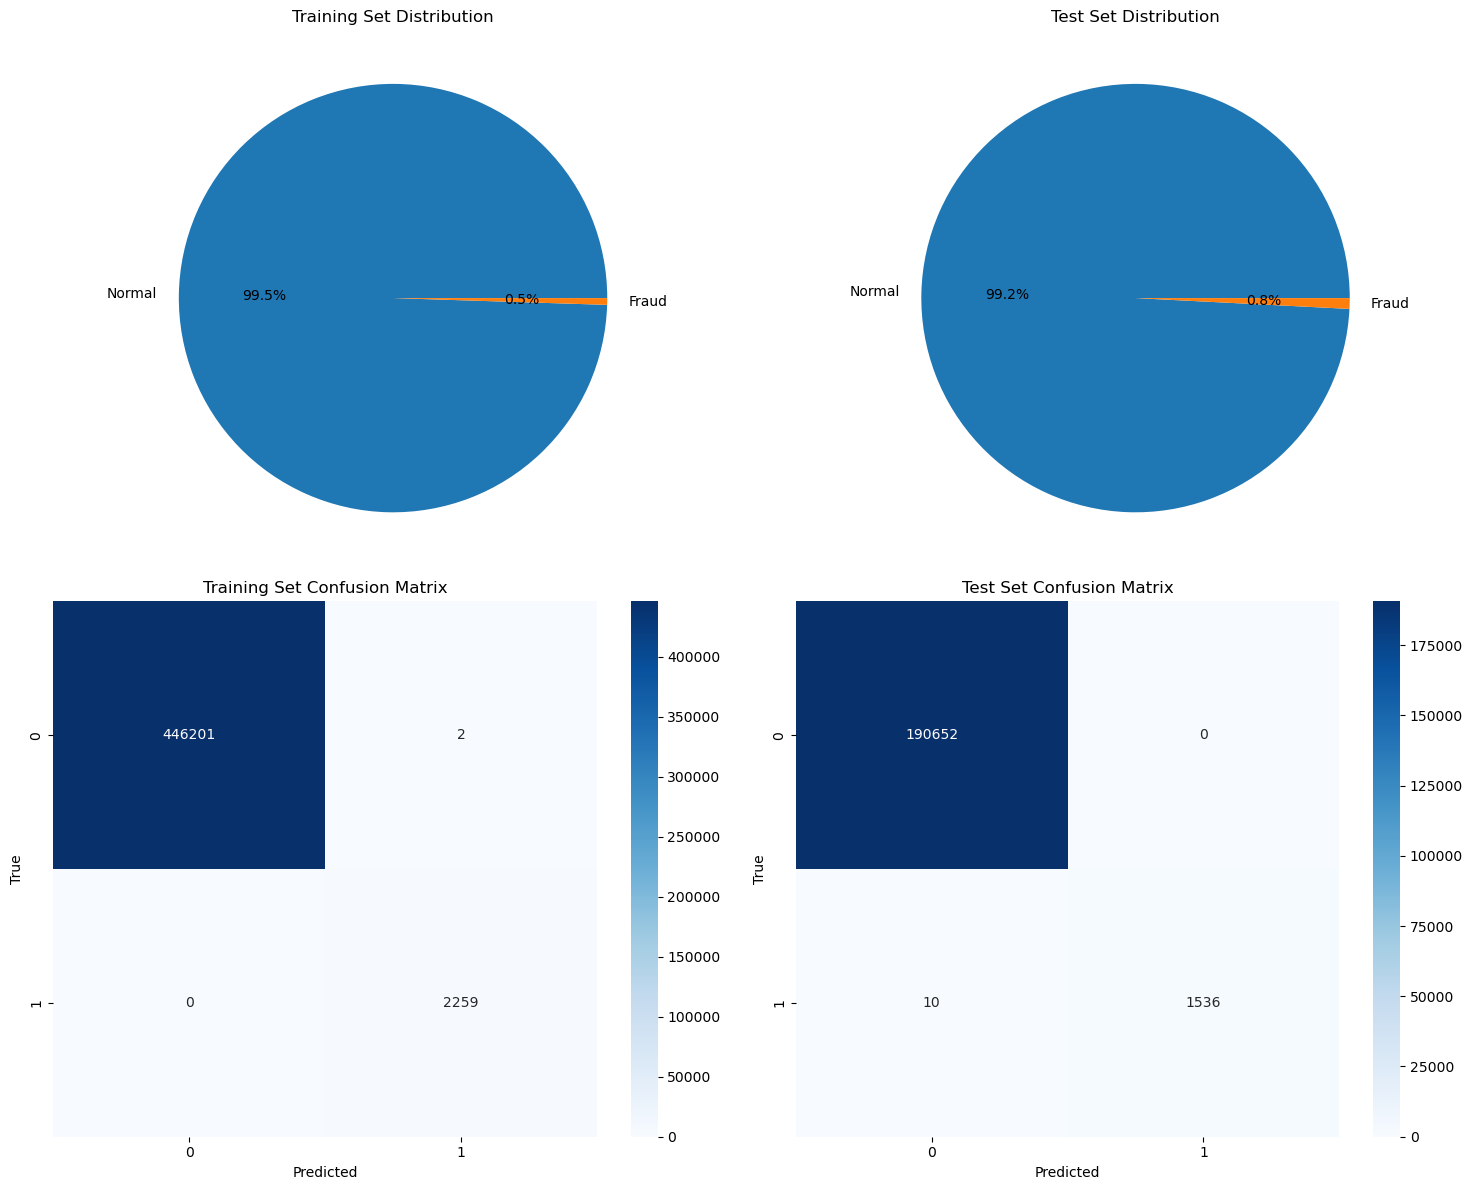

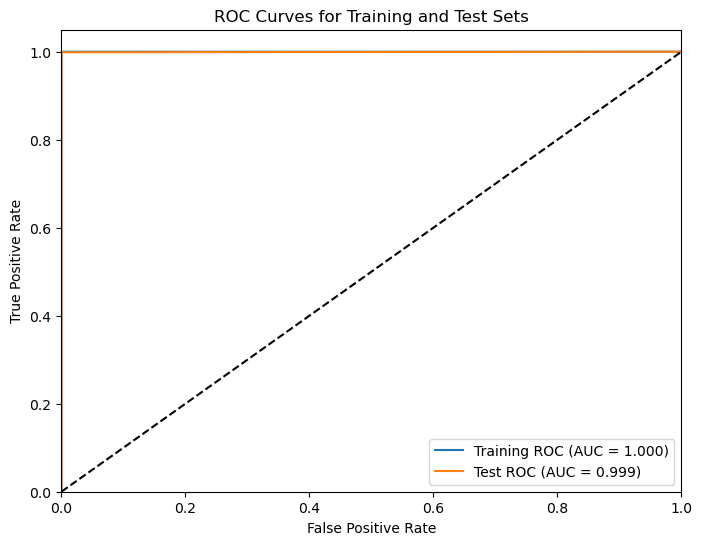


Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446203
           1       1.00      1.00      1.00      2259

    accuracy                           1.00    448462
   macro avg       1.00      1.00      1.00    448462
weighted avg       1.00      1.00      1.00    448462


Test Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190652
           1       1.00      0.99      1.00      1546

    accuracy                           1.00    192198
   macro avg       1.00      1.00      1.00    192198
weighted avg       1.00      1.00      1.00    192198



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 创建子图
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 2. 训练集真实值分布
train_real_counts = pd.Series(y_train).value_counts()
ax1.pie(train_real_counts, labels=['Normal', 'Fraud'], autopct='%1.1f%%')
ax1.set_title('Training Set Distribution')

# 3. 测试集真实值分布
test_real_counts = pd.Series(y_test).value_counts()
ax2.pie(test_real_counts, labels=['Normal', 'Fraud'], autopct='%1.1f%%')
ax2.set_title('Test Set Distribution')

# 4. 训练集预测结果
y_train_pred = clf.predict(X_train)
train_confusion = pd.crosstab(y_train, y_train_pred, 
                            rownames=['True'], 
                            colnames=['Predicted'])
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title('Training Set Confusion Matrix')

# 5. 测试集预测结果
test_confusion = pd.crosstab(y_test, y_pred, 
                           rownames=['True'], 
                           colnames=['Predicted'])
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_title('Test Set Confusion Matrix')

plt.tight_layout()
plt.show()

# 6. 绘制ROC曲线
plt.figure(figsize=(8, 6))
from sklearn.metrics import roc_curve, auc

# 计算训练集和测试集的ROC曲线
y_train_prob = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob)

# 计算AUC
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# 绘制ROC曲线
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.3f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Training and Test Sets')
plt.legend(loc="lower right")
plt.show()

# 7. 打印详细评估指标
print("\nTraining Set Metrics:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Metrics:")
print(classification_report(y_test, y_pred))